# Apartat (B): Classificació Numèrica (6pts)

### 1. EDA (exploratory data analysis)

In [117]:
# afegim llibreries necessaries
from sklearn.datasets import make_regression
import numpy as np
import pandas as pd
%matplotlib inline
from matplotlib import pyplot as plt
import scipy.stats
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn import preprocessing
import sklearn


# visualitzarem només 3 decimals per mostra
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# llegim les dades del csv
def load_dataset(path):
    dataset = pd.read_csv(path, header=0, delimiter=',')
    return dataset

# carreguem dataset 
dataset = load_dataset('water_potability.csv')
data = dataset.values

In [118]:
dataset

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890,20791.319,7.300,368.516,564.309,10.380,86.991,2.963,0
1,3.716,129.423,18630.058,6.635,NaN,592.885,15.180,56.329,4.501,0
2,8.099,224.236,19909.542,9.276,NaN,418.606,16.869,66.420,3.056,0
3,8.317,214.373,22018.417,8.059,356.886,363.267,18.437,100.342,4.629,0
4,9.092,181.102,17978.986,6.547,310.136,398.411,11.558,31.998,4.075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668,193.682,47580.992,7.167,359.949,526.424,13.894,66.688,4.436,1
3272,7.809,193.553,17329.802,8.061,NaN,392.450,19.903,NaN,2.798,1
3273,9.420,175.763,33155.578,7.350,NaN,432.045,11.039,69.845,3.299,1
3274,5.127,230.604,11983.869,6.303,NaN,402.883,11.169,77.488,4.709,1


In [119]:
print("Dimensió base de dades: ", dataset.shape)
print("Número de atributs: ", dataset.columns.size)

Dimensió base de dades:  (3276, 10)
Número de atributs:  10


In [120]:
print("Tipus d'atributs:")
dataset.dtypes

Tipus d'atributs:


ph                 float64
Hardness           float64
Solids             float64
Chloramines        float64
Sulfate            float64
Conductivity       float64
Organic_carbon     float64
Trihalomethanes    float64
Turbidity          float64
Potability           int64
dtype: object

In [121]:
#categoria1 = dataset[dataset.Potability == 0]
#categoria2 = dataset[dataset.Potability == 1]
#print("Categoria 1: ", categoria1["Potability"].count())
#print("Categoria 2: ", categoria2["Potability"].count())

target = pd.Index(dataset['Potability'])
target.value_counts()

0    1998
1    1278
Name: Potability, dtype: int64

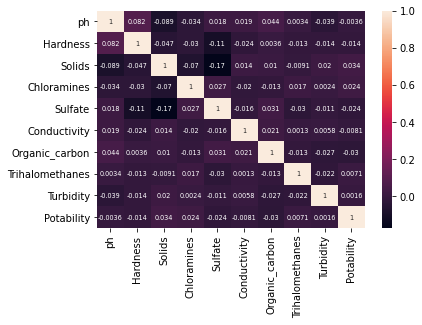

In [122]:
correlacio = dataset.corr()
plt.figure()
ax = sns.heatmap(correlacio, annot=True, annot_kws={"size": 6.5})

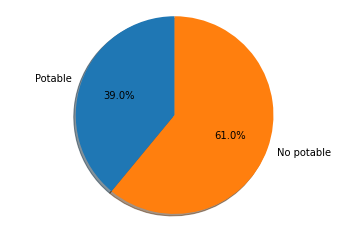

In [123]:
potable = dataset[dataset.Potability == 1]
noPotable = dataset[dataset.Potability == 0]

fig,ax1 = plt.subplots()
labels = 'Potable', 'No potable'
ax1.pie([potable.shape[0],noPotable.shape[0]], labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')

plt.show()

### 2. Prepocessing (normalitzation, outlier removal, feature selection..)

In [124]:
dataset.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [125]:
dataset['ph'].fillna(value=dataset['ph'].median(),inplace=True)
dataset['Sulfate'].fillna(value=dataset['Sulfate'].median(),inplace=True)
dataset['Trihalomethanes'].fillna(value=dataset['Trihalomethanes'].median(),inplace=True)

In [126]:
dataset.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [127]:
#imp = SimpleImputer(missing_values=np.nan, strategy='mean')
#imp.fit(([[1, 2, 3, 4, 5, 6, 7, np.nan, 9, 10], [np.nan, 3, 3, 4, 5, 6, 7, 8, 9, 10], [7, np.nan, 3, 4, 5, 6, 7, 8, 9, 10]]))
#SimpleImputer()
#X = dataset 
#print(imp.transform(X))
#lo de los nans el enunciado pone que se puede hacer con esto pero no he consrguido que funcione y he encontrado eso de fillna

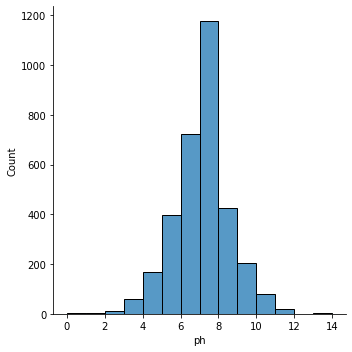

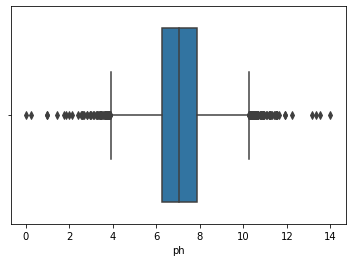

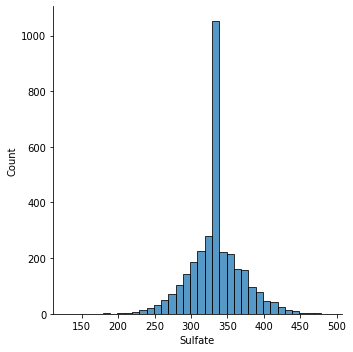

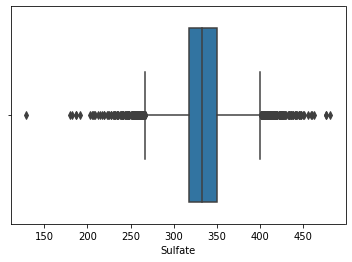

In [132]:
#outlier removal
sns.displot(dataset['ph'], binwidth=1, multiple="stack")
plt.show()

sns.boxplot(dataset['ph'])
plt.show()

sns.displot(dataset['Sulfate'], binwidth=10, multiple="stack")
plt.show()

sns.boxplot(dataset['Sulfate'])
plt.show()


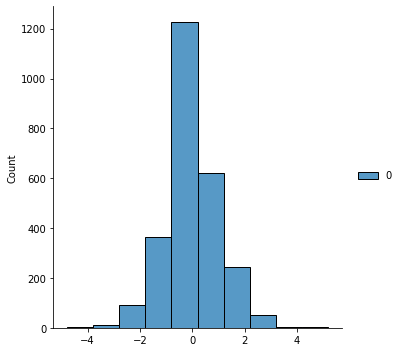

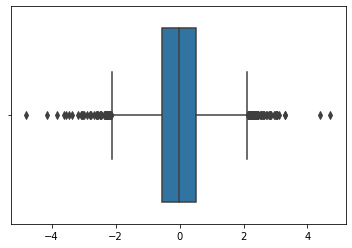

In [110]:
#normalitzacio de dades utilitzant preprocessing
data = dataset.values

x = data[:,[0,1,2,3,4,5,6,7,8]]
y = data[:,9]
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x,y, test_size=0.20, random_state=39) #39

scaler = preprocessing.StandardScaler().fit(x_train)
x_scaled = scaler.transform(x_train)

print(x_scaled)
